<a href="https://colab.research.google.com/github/datascientist-ld1981/Speech-Recognition/blob/main/Speech_Recognition_ADC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-0e98ab559061>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wav.read('harvard.wav')


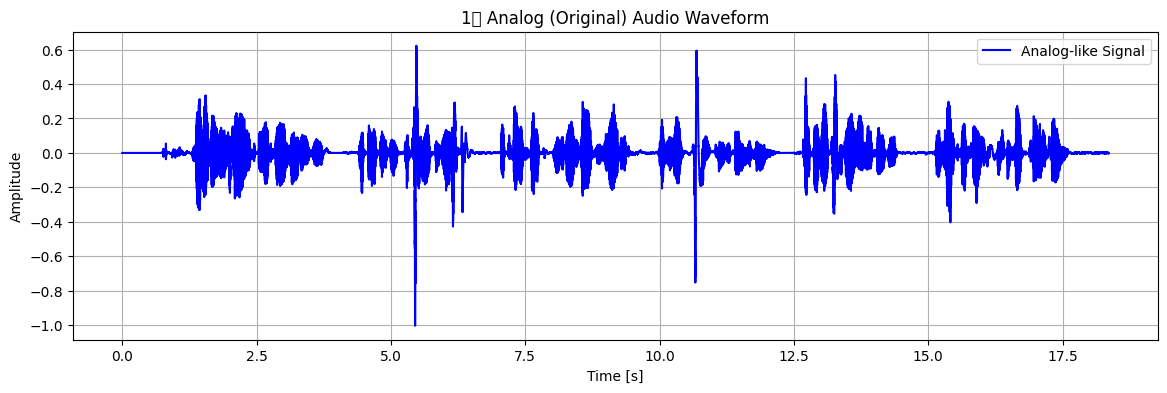

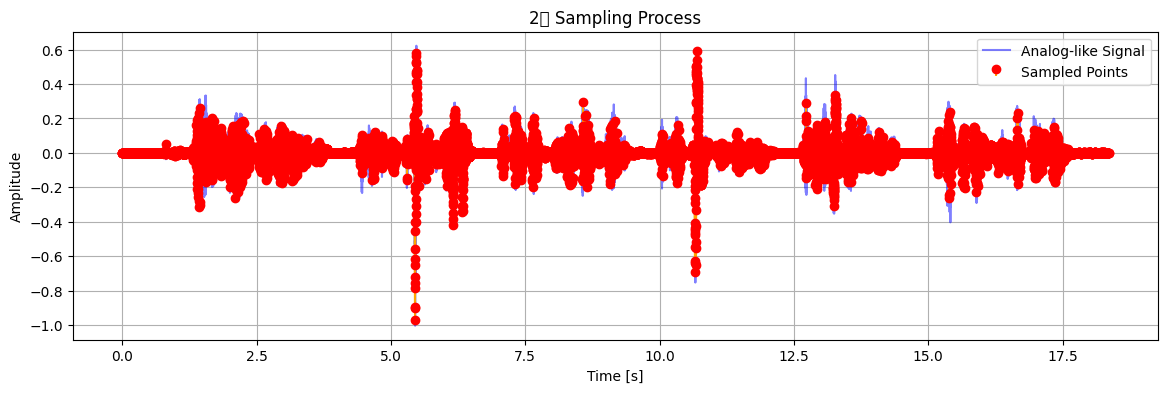

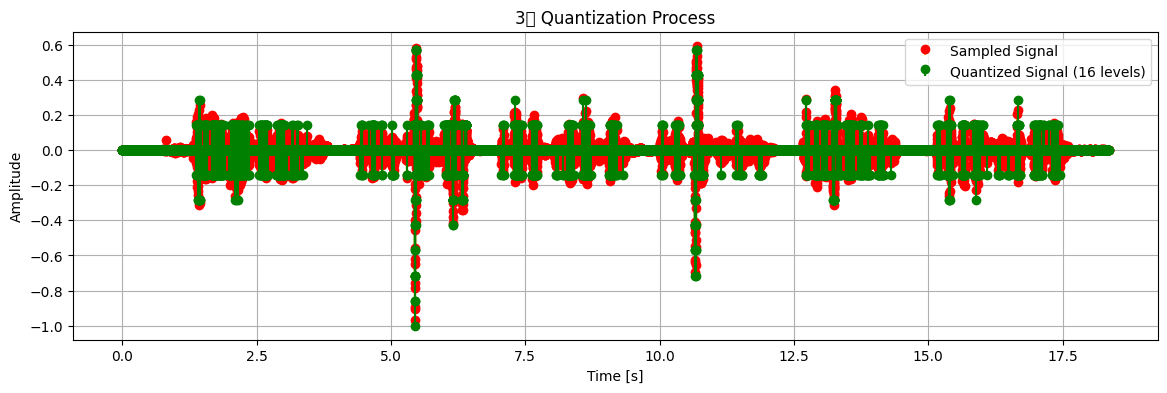

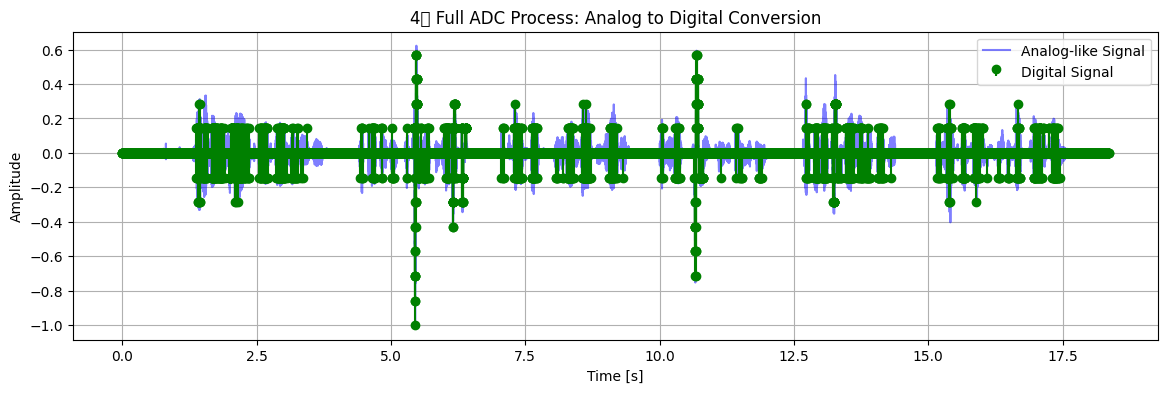

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# 1️⃣ Load the analog-like audio signal
sample_rate, audio = wav.read('harvard.wav')

# If stereo, take one channel
if audio.ndim == 2:
    audio = audio[:, 0]

# Normalize audio between -1 and 1
audio = audio / np.max(np.abs(audio))

# Time axis
time = np.linspace(0, len(audio) / sample_rate, num=len(audio))

# Plot original waveform (Analog-like Signal)
plt.figure(figsize=(14, 4))
plt.plot(time, audio, color='blue', label='Analog-like Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('1️⃣ Analog (Original) Audio Waveform')
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Sampling (downsampling)
downsample_factor = 50
sampled_audio = audio[::downsample_factor]
sampled_time = time[::downsample_factor]

# Plot sampled points over the original waveform
plt.figure(figsize=(14, 4))
plt.plot(time, audio, color='blue', alpha=0.5, label='Analog-like Signal')
plt.stem(sampled_time, sampled_audio, linefmt='orange', markerfmt='ro', basefmt=" ", label='Sampled Points')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('2️⃣ Sampling Process')
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Quantization (reduce bit depth)
quantization_levels = 16
quantized_audio = np.round((sampled_audio + 1) * (quantization_levels / 2 - 1))
quantized_audio = (quantized_audio / (quantization_levels / 2 - 1)) - 1

# Plot quantized waveform
plt.figure(figsize=(14, 4))
plt.stem(sampled_time, sampled_audio, linefmt='orange', markerfmt='ro', basefmt=" ", label='Sampled Signal')
plt.stem(sampled_time, quantized_audio, linefmt='green', markerfmt='go', basefmt=" ", label=f'Quantized Signal ({quantization_levels} levels)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('3️⃣ Quantization Process')
plt.legend()
plt.grid()
plt.show()

# 4️⃣ Full comparison (Analog vs Digital)
plt.figure(figsize=(14, 4))
plt.plot(time, audio, color='blue', alpha=0.5, label='Analog-like Signal')
plt.stem(sampled_time, quantized_audio, linefmt='green', markerfmt='go', basefmt=" ", label='Digital Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('4️⃣ Full ADC Process: Analog to Digital Conversion')
plt.legend()
plt.grid()
plt.show()
